# **의사결정나무(Decision Tree): 수업실습용**

## **1. 라이브러리 로드**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 전처리 및 의사결정나무 모델 생성, 학습, 평가, 시각화 패키지
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 사용하기
# plt.rc('font', family='Malgun Gothic')

----------------------------------------------------------------------------------

## **2. 데이터 로드**

**Breast Cancer Coimbra**
- 포르투갈 코임브라 대학에서 수집된 유방암 관련 데이터
- 환자의 Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1가 포함된 9개의 x변수와 유방암 진단 결과인 1개의 y변수로 구성된 데이터셋
- 총 관측치 개수: 116개
- https://github.com/singhsukhendra/Breast-Cancer-Coimbra-Data-Set-/blob/master/dataR2.csv

In [2]:
# csv 파일 로드
data = pd.read_csv('dataR2.csv')
data.shape

(116, 10)

In [3]:
# 데이터셋 확인
# defaut로 앞에서 5개의 데이터를 출력
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
# 데이터셋의 요약 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
# 결측치 확인
data.isnull().sum() #결측치 없음 확인함

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [6]:
# column 별 기본적인 통계 값 확인
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [20]:
# 모델 훈련을 위해 실제 label(Classification)은 y 변수로 따로 저장 후 제거
# y : 양성(2), 음성(1)으로 구분되는 Classification
y = data['Classification']
# 편의상 양성은 1로 음성은 0으로 변환
y = y-1
data2 = data.drop(['Classification'], axis=1)
data2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


----------------------------------------------------------------------------------

## **3. 탐색적 데이터 분석(EDA)**

### **3-1. 변수 별 boxplot 확인**
- 모델 성능에 영향을 줄 수 있는 이상치에 대한 간단 시각화 분석 가능
- 데이터 분포를 쉽게 파악 가능

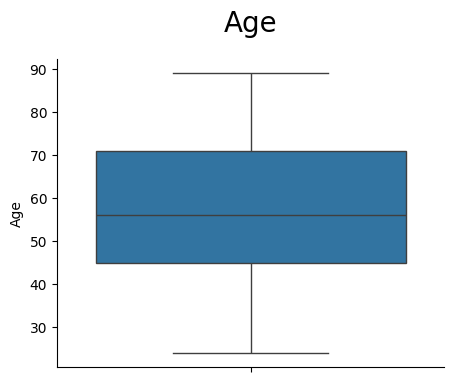

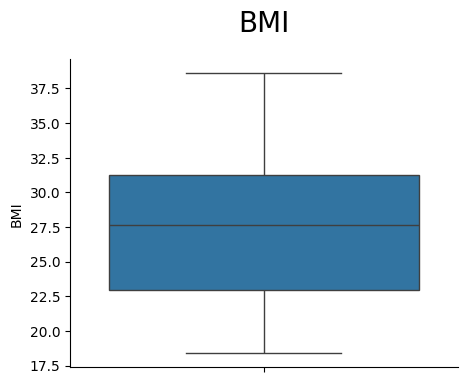

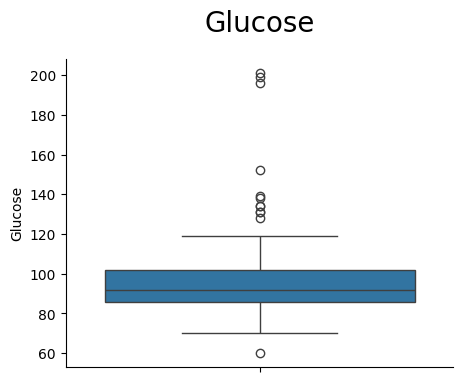

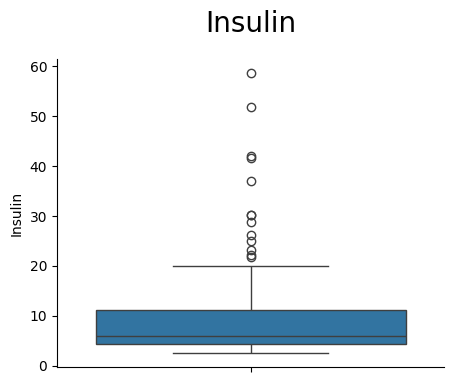

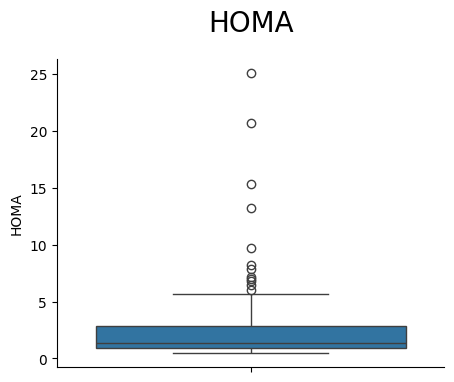

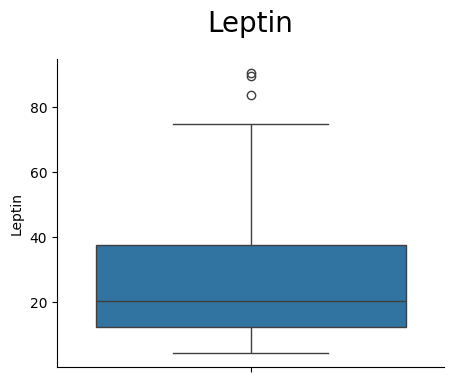

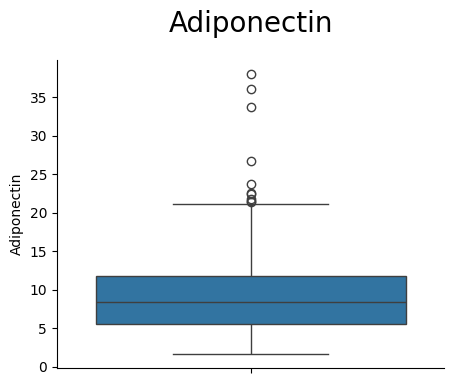

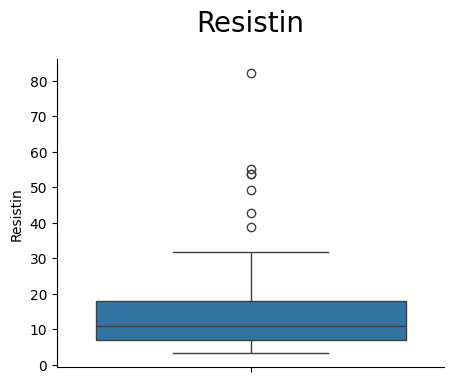

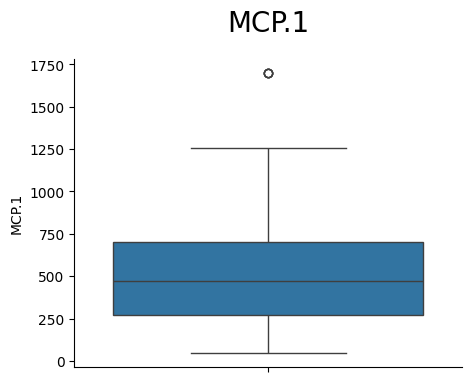

In [8]:
# 변수 별 boxplot 확인
for i in range (len(data2.columns)):
    plt.figure(figsize=[5,4])
    sns.boxplot(data=data2[data2.columns[i]])
    plt.title(data2.columns[i], size=20, pad=20)
    sns.despine()
    plt.show()

### **3-2. 독립변수들간의 상관성 분석**
- 상관계수는 -1에서 1 사이의 값을 가지며 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 나타냄
- 0에 가까운 값은 상관관계가 없을을 의미
- 독립 변수간에 높은 상관관계가 존재할 경우 다중공선성 문제가 발생할 수 있음
    
    ***-> 회귀 분석 등의 모델링에서 주의해야하는 부분***

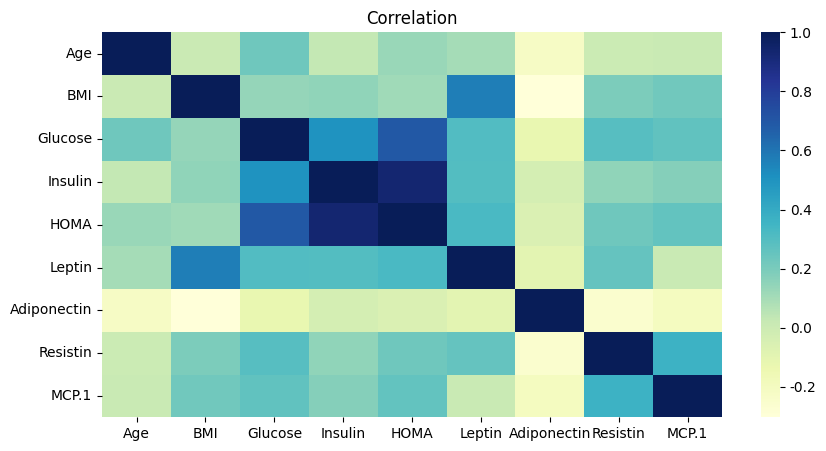

In [9]:
# 독립변수들간의 상관성 분석
df_corr = data2.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, cmap="YlGnBu") # 히프맵으로 시각화
plt.title('Correlation')
plt.show()

### **3-3. 각 변수 별 히스토그램**
- 데이터 분포 확인에 용이
- 변수의 정규성 확인
- 변수의 변환 또는 클래스 불균형 확인에 용이

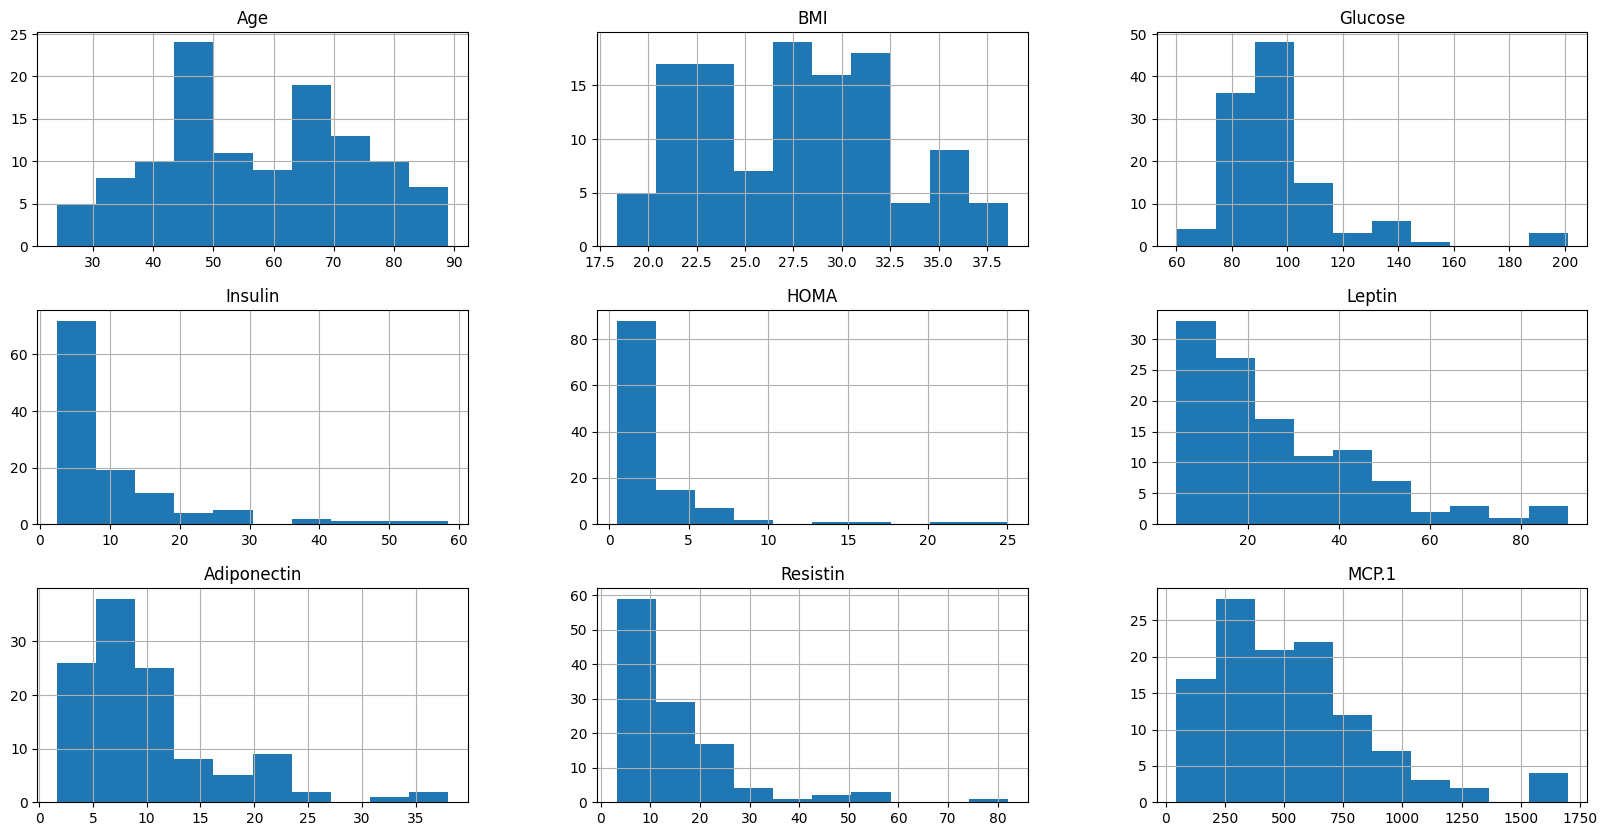

In [10]:
# 각 변수 별 히스토그램
h = data2.hist(figsize=(20,10))

# => 데이터 스케일 조정 필요

### **3-4. 차원 축소(PCA) 진행**
- Y 데이터에 대한 데이터 분포 확인

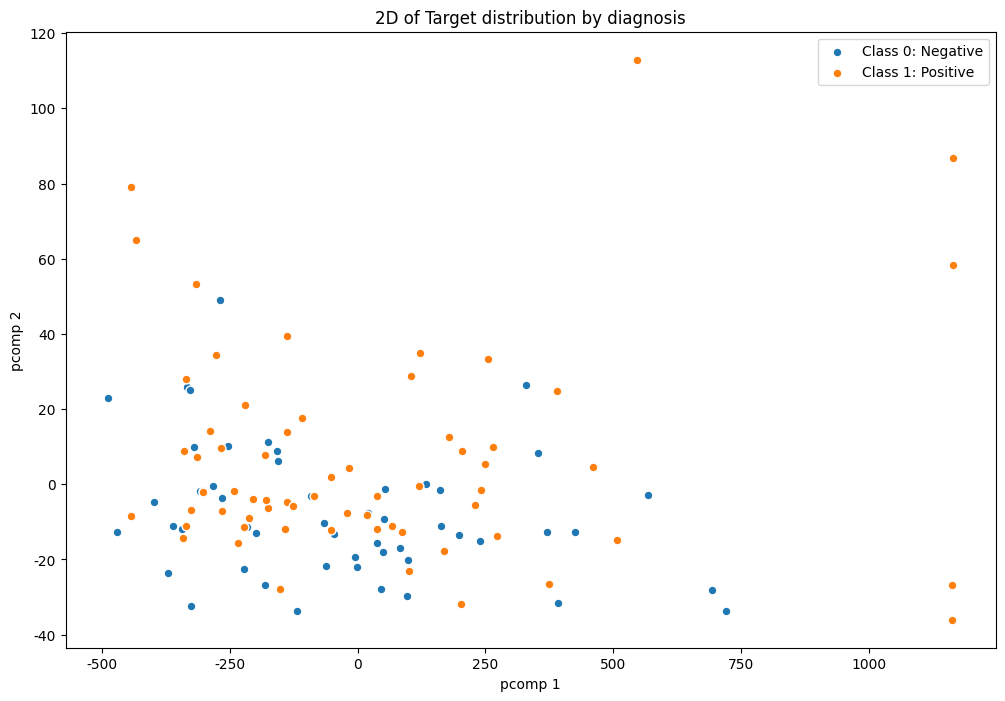

In [29]:
# 차원 축소(PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data2)

plt.figure(figsize=(12, 8))
# 클래스별로 산점도 그리기
for cls in y.unique():
    plt.scatter(data_pca[y == cls, 0], data_pca[y == cls, 1], 
                s=40, edgecolors='white', label=f'Class {cls}: Negative' if cls == 0 else f'Class {cls}: Positive')
plt.title("2D of Target distribution by diagnosis")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.show()

----------------------------------------------------------------------------------

## **4. 데이터 전처리**

### **4-1. 데이터 정규화**
- 데이터 정규화란?
    > 서로 다른 특성(feature)들이 동일한 스케일로 변환시키기 위한 작업 -> 모델 성능 향상에 도움을 줌
- EDA 과정에서 히스토그램 확인 결과(3-1-3.) 데이터 스케일 조정 필요
- **RobustScaler**: 중앙값(median)과 IQR(Interquartile Range, 사분위 범위)을 사용하여 데이터를 변환

In [12]:
# 정규화 Scaler 적용
scaler = RobustScaler()
data_scaling = scaler.fit_transform(data2)
print("정규화 적용 후 데이터셋 크기 : ", data_scaling.shape)

정규화 적용 후 데이터셋 크기 :  (116, 9)


### **4-2. 학습, 검증 데이터 분할**
- train:test = 0.7:0.3 비율로 분할

In [13]:
# X와 y 데이터를 train dataset과 test dataset으로 split
X_train, X_test, y_train, y_test = train_test_split(data_scaling, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Train dataset 크기 : ", X_train.shape)
print("Test dataset 크기 : ", X_test.shape)

Train dataset 크기 :  (81, 9)
Test dataset 크기 :  (35, 9)


----------------------------------------------------------------------------------

## **5. Decision Tree 모델 구축**
- **Decision Tree란?**
    - 각 데이터들이 가진 특징으로부터 패턴을 예측 가능한 규칙들의 조함으로 나타내며, 이를 기반으로 분류를 수행하는 지도학습기반의 모델
    - 분류와 회귀 모두 가능한 모델
    > Dicision Tree의 기본 구조
    >  
    > 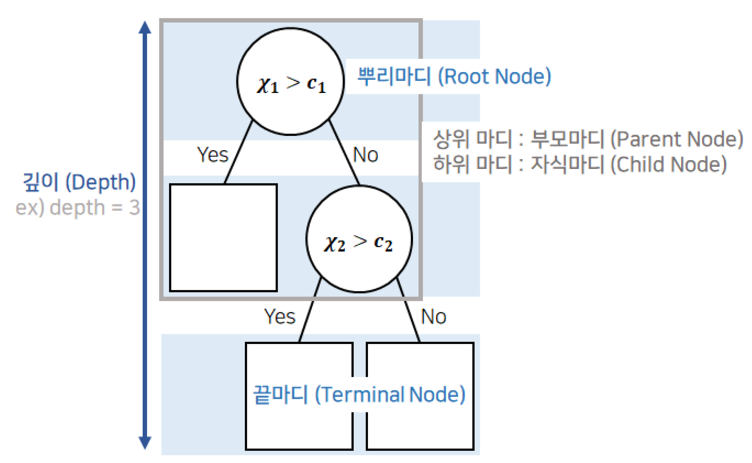



- **sklearn.tree의 DecisionTreeClassifier는 CART 알고리즘 기반의 모듈**
  
  
- ***하이퍼파라미터 설명***
    - criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
        - 분할변수와 분할점을 결정하는 비용 함수 설정
    - splitter: {“best”, “random”}, default=”best”
        - 노드 분할 방법
    - max_depth: int, default=None
        - 트리의 최대 깊이
    - min_samples_split: int or float, default=2
        - 내부 노드를 분할하는 데 필요한 최소 샘플 수
    - min_samples_leaf: int or float, default=1
        - 리프 노드가 되기 위해 필요한 최소 샘플 수
    - max_features: int, float or {“sqrt”, “log2”}, default=None
        - 각 노드에서 분할에 사용할 최대 특성 수(None->모든 특성 사용)
    - random_state: int, RandomState instance or None, default=None
        - 모델의 재현성을 위한 난수 생성기의 시드(None->매번 다르게)

### **5-1. 모델 학습 및 예측**

In [14]:
# 의사결정나무 모델 생성
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
# 의사결정나무 모델 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# 학습된 의사결정나무 모델로 Train/Test dataset 예측
dt_predict_train = dt.predict(X_train)
dt_predict_test = dt.predict(X_test)

### **5-2. 모델 평가**

In [16]:
# Train/Test dataset 정확도 확인
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))


accuracy = mt.accuracy_score(y_test, dt_predict_test)
recall = mt.recall_score(y_test, dt_predict_test)
precision = mt.precision_score(y_test, dt_predict_test)
f1_score = mt.f1_score(y_test, dt_predict_test)
matrix = mt.confusion_matrix(y_test, dt_predict_test)

print('\n----------Classification report for the Test dataset-----------\n')
print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')

Training set score: 1.0000
Test set score: 0.6286

----------Classification report for the Test dataset-----------

Accuracy:  0.63 

Recall:  0.47 

Precision:  0.67 

F1_score:  0.55 



**(1) confusion matrix**

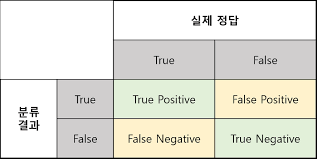

<Axes: >

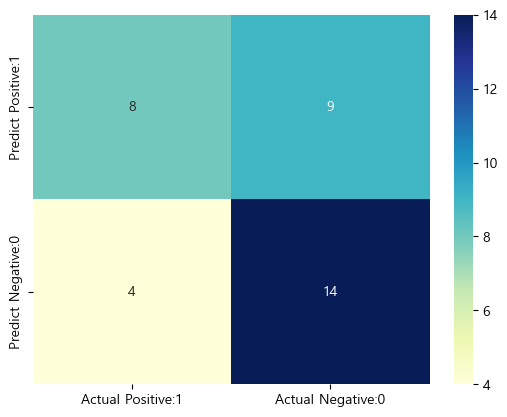

In [17]:
# Confusion Matrix 출력
cm = confusion_matrix(y_test, dt_predict_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**(2) Tree 시각화**
- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

[Text(0.5138888888888888, 0.9375, 'Glucose <= 0.277\ngini = 0.491\nsamples = 81\nvalue = [35, 46]\nclass = 1(양성)'),
 Text(0.2777777777777778, 0.8125, 'Resistin <= -0.018\ngini = 0.454\nsamples = 46\nvalue = [30, 16]\nclass = 0(음성)'),
 Text(0.3958333333333333, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'BMI <= -0.869\ngini = 0.302\nsamples = 27\nvalue = [22, 5]\nclass = 0(음성)'),
 Text(0.1111111111111111, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1(양성)'),
 Text(0.2222222222222222, 0.5625, 'Insulin <= 0.643\ngini = 0.211\nsamples = 25\nvalue = [22, 3]\nclass = 0(음성)'),
 Text(0.1111111111111111, 0.4375, 'Resistin <= -0.694\ngini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = 0(음성)'),
 Text(0.05555555555555555, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1(양성)'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = 0(음성)'),
 Text(0.3333333333333333, 0.4375, 'MCP.1 <= -0.095\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\

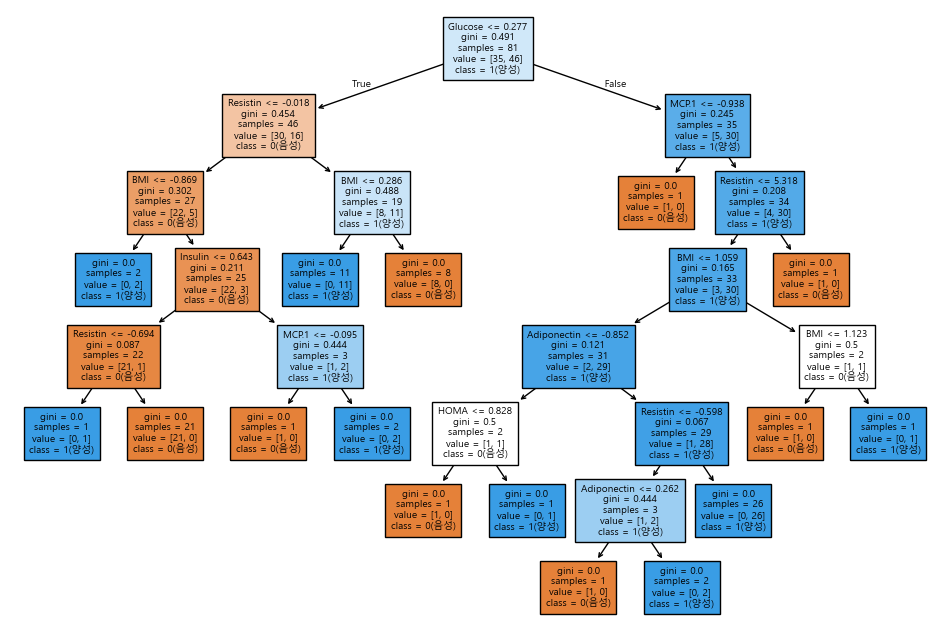

In [18]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt.fit(X_train, y_train), feature_names=data2.columns, class_names=['0(음성)', '1(양성)'], filled=True, fontsize=7) 

**(3) 모델 교차 검증**
- 5-Fold Cross Validation: 데이터셋을 5개의 부분(폴드)으로 나눈 후, 각 폴드에서 모델을 훈련하고 검증하는 과정을 반복하는 기법
- 검증 과정:
    1) 각 폴드를 한 번씩 검증 세트로 사용하고, 나머지 4개의 폴드로 모델을 훈련
    2) 예를 들어, 첫 번째 폴드를 검증 세트로 사용하면, 나머지 4개 폴드로 모델을 훈련
    3) 그런 다음, 훈련된 모델을 첫 번째 폴드에 대해 평가합니다.
    4) 이 과정을 5번 반복하여 각 폴드에 대해 모델의 성능을 평가

In [19]:
# 교차 검증(5-Fold Cross Validation)
scores = cross_val_score(dt, X_train, y_train, cv = 5)

print('Cross-validation scores:')
display(pd.DataFrame(scores, columns=['Accuracy']))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:


,Accuracy
0,0.647059
1,0.437500
2,0.500000
3,0.562500
4,0.812500


Average cross-validation score: 0.5919


## **6. 가지치기 수행 (Pruning phase)**
> 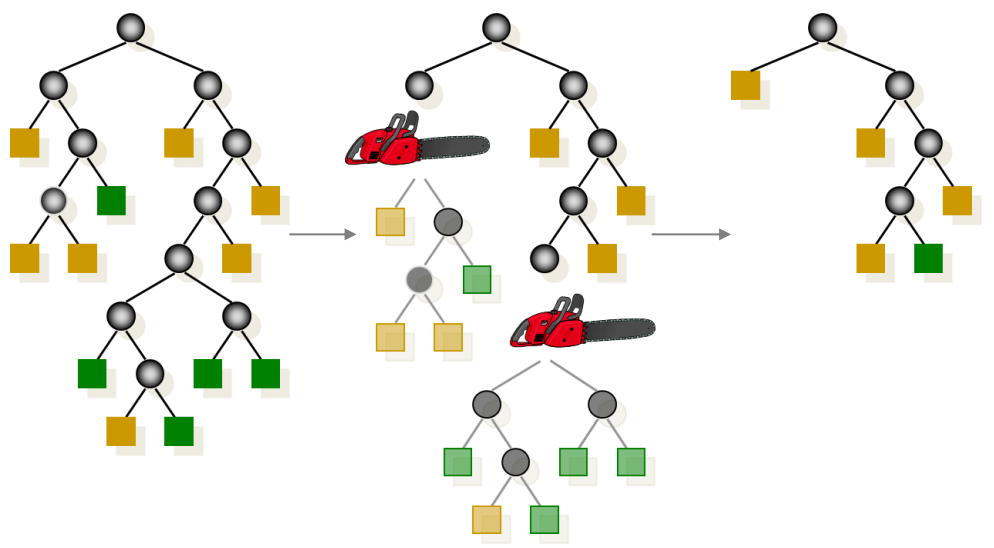
  
- **분기 수가 증가하는 경우:** 처음에는 새로운 데이터에 대한 오분류율이 감소하나 일정 수준 이상이 되면 오분류율이 되레 증가하는 현상이 발생
    - 가지치기 과정을 통해 분기 수 조절 필요
- **모델의 복잡성을 줄이고 과적합(overfitting)을 방지하여 모델의 성능을 높이는 과정**

In [20]:
pruned_dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) # max_depth=3으로 제한
pruned_dt_clf .fit(X_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(X_test, y_test)))


Accuracy of training set: 0.926
Accuracy of test set: 0.657


- 가지치기 수행 전보다 test set에 대한 정확도가 향상됨을 확인할 수 있다. ***(0.6286 -> 0.657)***

[Text(0.5769230769230769, 0.875, 'Glucose <= 0.277\ngini = 0.491\nsamples = 81\nvalue = [35, 46]\nclass = 1(양성)'),
 Text(0.3076923076923077, 0.625, 'Resistin <= -0.018\ngini = 0.454\nsamples = 46\nvalue = [30, 16]\nclass = 0(음성)'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'BMI <= -0.869\ngini = 0.302\nsamples = 27\nvalue = [22, 5]\nclass = 0(음성)'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1(양성)'),
 Text(0.23076923076923078, 0.125, 'gini = 0.211\nsamples = 25\nvalue = [22, 3]\nclass = 0(음성)'),
 Text(0.46153846153846156, 0.375, 'BMI <= 0.286\ngini = 0.488\nsamples = 19\nvalue = [8, 11]\nclass = 1(양성)'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = 1(양성)'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0(음성)'),
 Text(0.8461538461538461, 0.625, 'Resistin <= 5.318\ngini = 0.245\nsamples = 35\nvalue = [5, 30]\nclass = 1(양성)'),
 Text(0.71

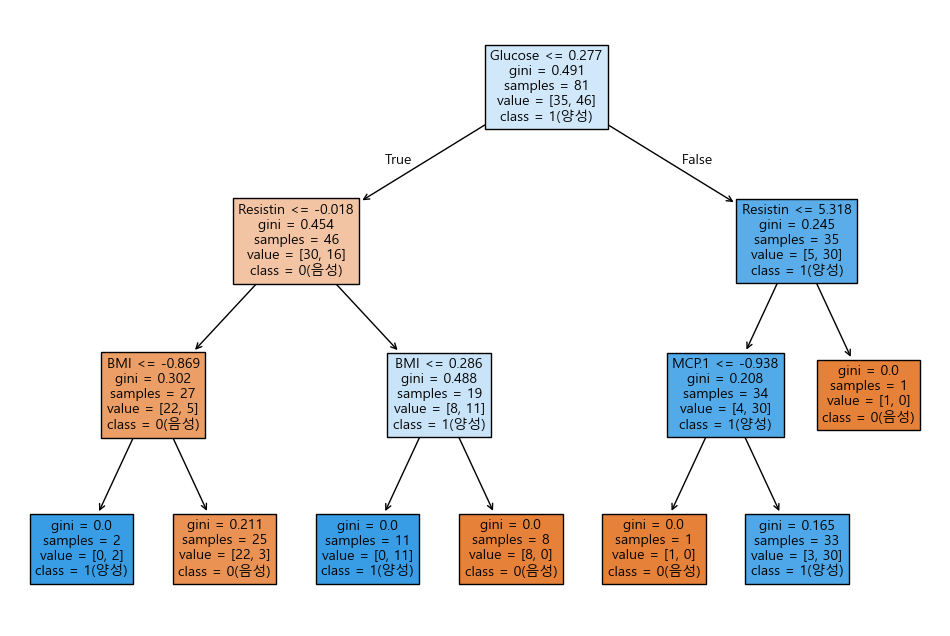

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(pruned_dt_clf.fit(X_train, y_train), feature_names=data2.columns, class_names=['0(음성)', '1(양성)'], filled=True, fontsize=10) 